<a href="https://colab.research.google.com/github/madhavjk/DataScience-ML_and_DL/blob/main/SESSION_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-04-27 13:20:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   123MB/s    in 1.6s    

2021-04-27 13:20:53 (123 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-04-27 13:20:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
local_zip2 = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip2, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-111.png', 'rock06ck02-034.png', 'rock02-015.png', 'rock04-070.png', 'rock04-031.png', 'rock03-111.png', 'rock07-k03-085.png', 'rock02-119.png', 'rock04-106.png', 'rock03-077.png']
['paper05-001.png', 'paper07-097.png', 'paper04-012.png', 'paper07-063.png', 'paper03-115.png', 'paper03-007.png', 'paper07-051.png', 'paper04-119.png', 'paper07-081.png', 'paper05-006.png']
['testscissors01-108.png', 'scissors01-034.png', 'scissors01-114.png', 'scissors03-093.png', 'scissors01-033.png', 'scissors04-105.png', 'scissors02-020.png', 'testscissors03-004.png', 'scissors04-104.png', 'testscissors01-087.png']


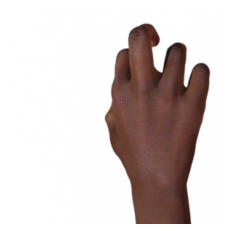

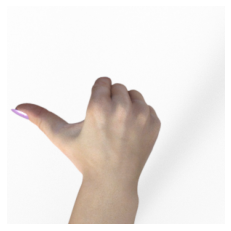

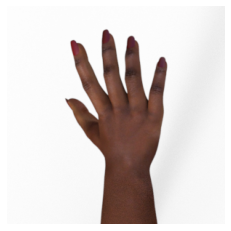

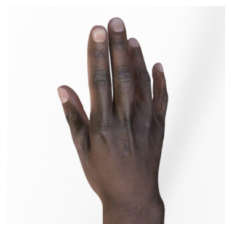

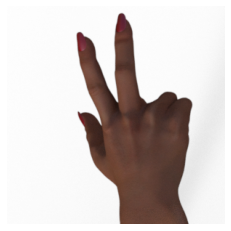

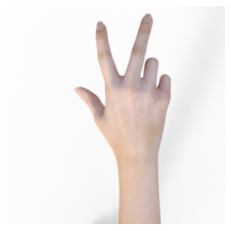

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
TRAINING_DIR = '/tmp/rps/'
training_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size =126,
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(3,activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs = 30,steps_per_epoch=20,validation_data=validation_generator,verbose = 1,validation_steps=3)

Epoch 1/30
20/20 [==============================] - 55s 1s/step - loss: 1.4481 - accuracy: 0.3320 - val_loss: 1.1148 - val_accuracy: 0.5538
Epoch 2/30
20/20 [==============================] - 20s 978ms/step - loss: 1.1413 - accuracy: 0.4179 - val_loss: 1.0335 - val_accuracy: 0.4462
Epoch 3/30
20/20 [==============================] - 19s 969ms/step - loss: 1.0621 - accuracy: 0.4515 - val_loss: 1.0748 - val_accuracy: 0.4516
Epoch 4/30
20/20 [==============================] - 20s 976ms/step - loss: 0.9476 - accuracy: 0.5268 - val_loss: 0.7624 - val_accuracy: 0.5887
Epoch 5/30
20/20 [==============================] - 19s 966ms/step - loss: 0.8383 - accuracy: 0.5977 - val_loss: 0.5637 - val_accuracy: 0.9651
Epoch 6/30
20/20 [==============================] - 19s 969ms/step - loss: 0.6815 - accuracy: 0.7491 - val_loss: 0.1425 - val_accuracy: 1.0000
Epoch 7/30
20/20 [==============================] - 19s 965ms/step - loss: 0.5926 - accuracy: 0.7642 - val_loss: 0.3124 - val_accuracy: 0.8575
Ep

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

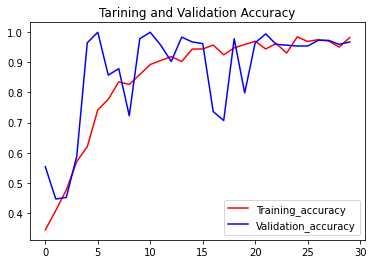

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(acc))
plt.plot(epochs,acc,'r',label = 'Training_accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation_accuracy')
plt.title('Tarining and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.save('rps.h5')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)